In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_housing_data()

## Define custom loss function

In [3]:
def huber_loss(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1.0
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

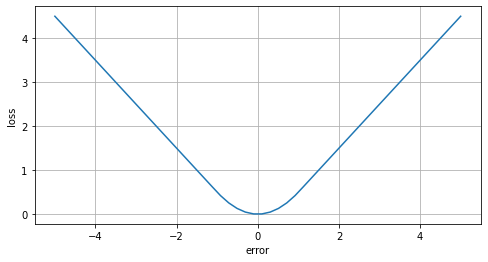

In [4]:
plt.figure(figsize=(8, 4))
error = np.linspace(-5, 5)
loss = huber_loss(error, 0)
plt.plot(error, loss)
plt.xlabel("error")
plt.ylabel("loss")
plt.grid(True)
plt.show()

## Training with custom loss

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss=huber_loss, optimizer='adam', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
363/363 [==============================] - 0s 876us/step - loss: 0.5712 - mae: 0.9324 - val_loss: 0.2775 - val_mae: 0.5903
Epoch 2/5
363/363 [==============================] - 0s 661us/step - loss: 0.2254 - mae: 0.5231 - val_loss: 0.2114 - val_mae: 0.4917
Epoch 3/5
363/363 [==============================] - 0s 654us/step - loss: 0.1902 - mae: 0.4704 - val_loss: 0.1922 - val_mae: 0.4636
Epoch 4/5
363/363 [==============================] - 0s 682us/step - loss: 0.1786 - mae: 0.4523 - val_loss: 0.1807 - val_mae: 0.4509
Epoch 5/5
363/363 [==============================] - 0s 675us/step - loss: 0.1729 - mae: 0.4439 - val_loss: 0.1755 - val_mae: 0.4452


## Saving/Loading custom loss 

In [6]:
model.save('model.h5')

In [7]:
model = keras.models.load_model('model.h5')
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
363/363 [==============================] - 0s 870us/step - loss: 0.1691 - mean_absolute_error: 0.4384 - val_loss: 0.1675 - val_mean_absolute_error: 0.4361
Epoch 2/2
363/363 [==============================] - 0s 675us/step - loss: 0.1665 - mean_absolute_error: 0.4346 - val_loss: 0.1566 - val_mean_absolute_error: 0.4162


In [8]:
model = keras.models.load_model('model.h5', custom_objects={'huber_loss': huber_loss})
history = model.fit(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Epoch 1/2
363/363 [==============================] - 0s 824us/step - loss: 0.1693 - mean_absolute_error: 0.4390 - val_loss: 0.1629 - val_mean_absolute_error: 0.4294
Epoch 2/2
363/363 [==============================] - 0s 653us/step - loss: 0.1668 - mean_absolute_error: 0.4347 - val_loss: 0.1659 - val_mean_absolute_error: 0.4325
